# WINE QUALITY PREDICTION

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.model_selection import train_test_split 

from sklearn import model_selection
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [2]:
df=pd.read_csv(r"C:\Users\hp\Downloads\archive (3)\WineQT.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [3]:
df=df.drop(['Id'],axis=1)

Finding null and duplicate values

In [4]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [5]:
df.duplicated().sum()

125

In [6]:
df.drop_duplicates()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6


In [7]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


outlier detection

In [8]:
def outlier_detection(df, column):
    z_scores = np.abs(stats.zscore(df[column]))
    df = df[(z_scores < 3)]
    print(column,'has--->',len(np.where(z_scores>3)[0]),'outliers')
    return df

In [9]:
for column in df.columns:
    df = outlier_detection(df, column)

fixed acidity has---> 9 outliers
volatile acidity has---> 5 outliers
citric acid has---> 1 outliers
residual sugar has---> 22 outliers
chlorides has---> 21 outliers
free sulfur dioxide has---> 10 outliers
total sulfur dioxide has---> 15 outliers
density has---> 8 outliers
pH has---> 6 outliers
sulphates has---> 15 outliers
alcohol has---> 5 outliers
quality has---> 5 outliers


In [10]:
X=df.drop(['quality'],axis =1)
y=df['quality']
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [11]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=1)
print(X_train.shape)

print(X_test.shape)

(816, 11)
(205, 11)


In [12]:
reg=linear_model.LinearRegression()
y_train_pred=reg.fit(X_train,y_train)


In [13]:
y_test_pred=reg.predict(X_test)

y_test_pred

array([5.39065812, 4.75294086, 4.92851812, 5.44075163, 5.70931942,
       6.05998278, 6.40718965, 5.0713125 , 5.62076029, 5.31118223,
       6.18664683, 5.72905481, 5.09664181, 6.12541005, 4.97151985,
       5.6664068 , 5.80664836, 5.05690187, 5.90352905, 6.42492399,
       6.46720063, 6.32823316, 5.34701507, 5.08654428, 5.45005852,
       6.3865336 , 5.30586681, 5.91542597, 5.98584364, 5.2856721 ,
       5.95666813, 6.01603074, 6.27522025, 5.48720928, 6.3150617 ,
       5.34636623, 6.25033845, 5.10611489, 5.17959529, 6.38942929,
       5.18112407, 5.00755532, 5.27938792, 6.0715398 , 6.61920409,
       5.69533531, 6.31021484, 5.27502188, 6.24271739, 5.23861681,
       5.40866908, 5.71147839, 5.41165813, 5.35905244, 5.12475984,
       4.957628  , 5.74136797, 6.2785851 , 6.17337784, 5.32929436,
       5.40957208, 6.35174671, 5.26865544, 5.45906891, 5.66066374,
       5.37948158, 5.67726267, 5.2218137 , 5.54012909, 5.51802417,
       6.64428496, 5.99782533, 6.37562884, 5.75042236, 6.23938

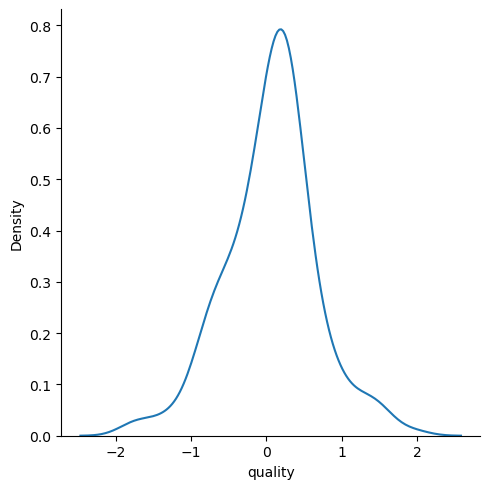

In [14]:
import seaborn as sns
sns.displot(y_test_pred-y_test,kind='kde')

Finding accuracy

In [15]:
y_test_pred = np.round(y_test_pred)

sum_correct = 0

for true_label, pred_label in zip(y_test, y_test_pred):
    if true_label == pred_label:
        sum_correct += 1

accuracy = sum_correct / len(y_test)
print("Accuracy:", accuracy)

Accuracy: 0.6536585365853659


In [16]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,confusion_matrix,r2_score

print("The mean absolute error is: ",mean_absolute_error(y_test_pred,y_test))
print("The mean squared error is: ",mean_squared_error(y_test_pred,y_test))
print("The R2 score is: ",r2_score(y_test_pred,y_test))

The mean absolute error is:  0.375609756097561
The mean squared error is:  0.43414634146341463
The R2 score is:  -0.3575148809523816
